# Stage One and Two 

I first impoerted the current version of the GSS dataset, and isolate the columns of interest based on the variables I wanted to include. I kept in basic variables like "year," "age," etc and added in three new vaiables of interest all relating to the topic of marraige (interracial marraige, same-sex marraige, and happiness in marraige). I further limited the dataset to the years I was interested in, years where two or all of these topics were surveyed, and spread them out as much as possible to see trends over time. 

In [2]:
import pandas as pd

columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'realrinc', 'region', 'racmar', 'hapmar', 'marhomo', 'happy']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

df = df.loc[df['year'].isin({1988, 2002, 2012})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race       degree realrinc           region  \
21875     1  1988  56.0  female  white     bachelor      NaN  MIDDLE ATLANTIC   
21876     2  1988  40.0  female  white     bachelor  31364.0  MIDDLE ATLANTIC   
21877     3  1988  72.0  female  white          NaN      NaN  MIDDLE ATLANTIC   
21878     4  1988  29.0  female  white     bachelor  22919.0  MIDDLE ATLANTIC   
21879     5  1988  25.0    male  white     bachelor  15682.0  MIDDLE ATLANTIC   
...     ...   ...   ...     ...    ...          ...      ...              ...   
57056  1970  2012  61.0  female  other     bachelor   6737.5         mountain   
57057  1971  2012  53.0  female  other  HIGH SCHOOL      NaN         mountain   
57058  1972  2012  48.0    male  white  HIGH SCHOOL  26950.0         mountain   
57059  1973  2012  37.0  female  other  HIGH SCHOOL   9187.5         mountain   
57060  1974  2012  22.0    male  other  HIGH SCHOOL      NaN         mountain  

# Stage Three 

I first visualized a random sample of "yes" or "no" responses "Favor a Law against Interracial Marriage" and found the mean and median of those responses. Generally speaking, most repondants answered "no," meaning they weren't in favor of a law against interracial marriage. I then plotted a simple bar graph to show the degree to which respondants agreed or diagreed that "Homosexuals should have the right to marry." The largest number of respondants strongly disagreed. I then plotted a table that compared people's repsonses to whether they agreed with homosexual's right to marry and their reported binary gender. It appeared more "female" respondants, in general, responded to this question than "male" respondants, but general trends in how many respondants strongly agreed vs strongly disagreed remained similar. 

In [26]:
racmar_sample = df.loc[df['racmar'].notnull()].sample(10)['racmar']
racmar_sample = racmar_sample.replace(['no', 'yes'], [0, 1])
print(racmar_sample)

print("Mean:", racmar_sample.mean())
print("Median:", racmar_sample.median())

23237    0
22856    0
23170    0
41068    0
23143    1
22354    0
40989    0
22414    0
23302    1
21989    0
Name: racmar, dtype: int64
Mean: 0.2
Median: 0.0


<AxesSubplot:title={'center':'Same-Sex Marriage?'}>

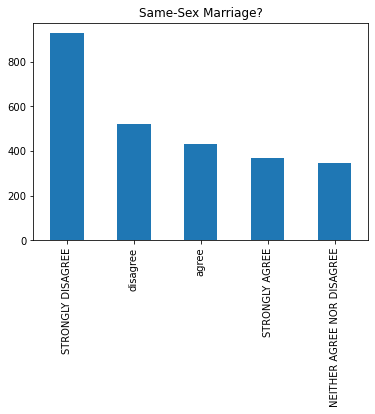

In [15]:
df['marhomo'].value_counts().plot(kind="bar", title="Same-Sex Marriage?")

In [24]:
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']
s_male = df_male["marhomo"].value_counts()
s_female = df_female["marhomo"].value_counts()
new_df = pd.DataFrame({"Male": s_male, "Female": s_female})
new_df

,Male,Female
STRONGLY AGREE,139,228
agree,186,247
NEITHER AGREE NOR DISAGREE,142,206
disagree,231,288
STRONGLY DISAGREE,443,484


# Stage Four 

I first grouped the data by how happy people were in their marraige, with if they responded yes or no to a law against interracial marriage, and their income. I then grouped by if they agreed homosexuals should marry with the interracial marraige question and income. I then set up groups of random responses to the homosexual marraige question, calculated the number of unique values in each group, and then calculated the ratio of observed categories to total observations. 

In [31]:
df['realrinc_f'] = df['realrinc'].astype(float)
df.groupby(['hapmar', 'racmar'], observed=True)['realrinc_f'].mean().round()

hapmar         racmar
VERY HAPPY     yes       28363.0
               no        29077.0
PRETTY HAPPY   yes       14465.0
               no        30534.0
NOT TOO HAPPY  yes       16406.0
               no        42115.0
Name: realrinc_f, dtype: float64

In [32]:
df.groupby(['marhomo', 'racmar'], observed=True)['realrinc_f'].mean().round()

marhomo                     racmar
STRONGLY AGREE              no        23193.0
agree                       yes       11259.0
                            no        19693.0
NEITHER AGREE NOR DISAGREE  yes       20555.0
                            no        21762.0
disagree                    yes       19413.0
                            no        20158.0
STRONGLY DISAGREE           yes       15848.0
                            no        19285.0
Name: realrinc_f, dtype: float64

In [33]:
group1 = ['NEITHER AGREE OR DISAGREE', 'NEITHER AGREE OR DISAGREE', 'NEITHER AGREE OR DISAGREE', 'NEITHER AGREE OR DISAGREE', 'NEITHER AGREE OR DISAGREE',
          'NEITHER AGREE OR DISAGREE', 'agree', 'agree']
group2 = ['STRGONLY DISAGREE', 'STRONGLY DISAGREE', 'STRONGLY DISAGREE', 'STRONGLY DISAGREE',
          'NEITHER AGREE OR DISAGREE', 'disagree', 'agree', 'STRONGLY AGREE']
group3 = ['STRONGLY DISAGREE', 'STRONGLY DISAGREE', 'NEITHER AGREE OR DISAGREE', 'NEITHER AGREE OR DISAGREE',
          'disagree', 'disagree', 'agree', 'STRONGLY AGREE']

print([len(set(group)) for group in [group1, group2, group3]])
print([len(set(group)) / len(group) for group in [group1, group2, group3]])

[2, 6, 5]
[0.25, 0.75, 0.625]


In [34]:
group1 = df_male['marhomo']
group2= df_female['marhomo']

print([len(set(group)) for group in [group1, group2]])
print([len(set(group)) / len(group) for group in [group1, group2]])

[6, 6]
[0.0021810250817884407, 0.0017296050735082155]
